<a href="https://colab.research.google.com/github/KunalDorik/Tamizan-Skills-Internship-ML-AI-PROJECT-5/blob/main/Project_5_Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
movies = pd.read_csv('movies.csv')    # columns: movieId, title, genres
ratings = pd.read_csv('ratings.csv')  # columns: userId, movieId, rating, timestamp


In [ ]:
user_movie_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')
user_movie_matrix.fillna(0, inplace=True)
user_movie_matrix.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Transpose to get movies as rows for item-based similarity
item_similarity = cosine_similarity(user_movie_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)


In [ ]:
def get_movie_recommendations(movie_title, movies_df, similarity_df, top_n=5):
    # Find the movieId for the given movie title
    movie_id = movies_df[movies_df['title'] == movie_title]['movieId'].values[0]
    # Get similarity scores for this movie
    sim_scores = similarity_df[movie_id].sort_values(ascending=False)
    # Exclude the movie itself and get top N
    top_movies = sim_scores.iloc[1:top_n+1].index
    # Get movie titles
    recommended_titles = movies_df[movies_df['movieId'].isin(top_movies)]['title'].values
    return recommended_titles

# Example usage:
print(get_movie_recommendations('Toy Story (1995)', movies, item_similarity_df))


['Star Wars: Episode IV - A New Hope (1977)'
 'Independence Day (a.k.a. ID4) (1996)'
 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'
 'Star Wars: Episode VI - Return of the Jedi (1983)'
 'Back to the Future (1985)']


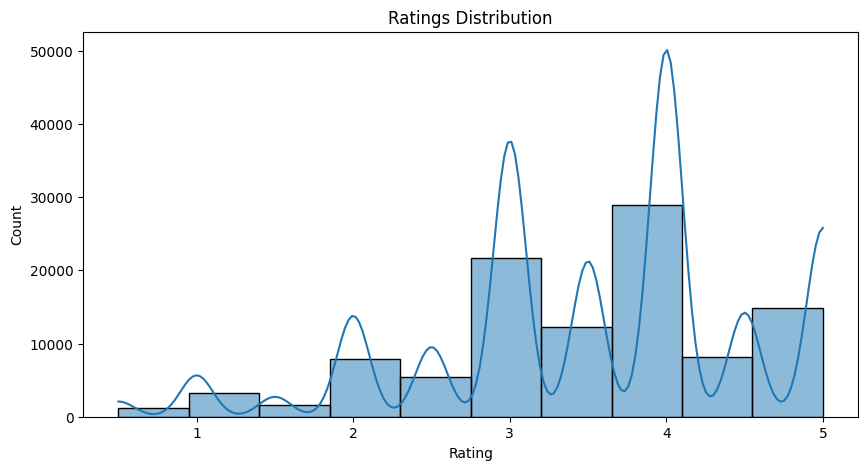

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


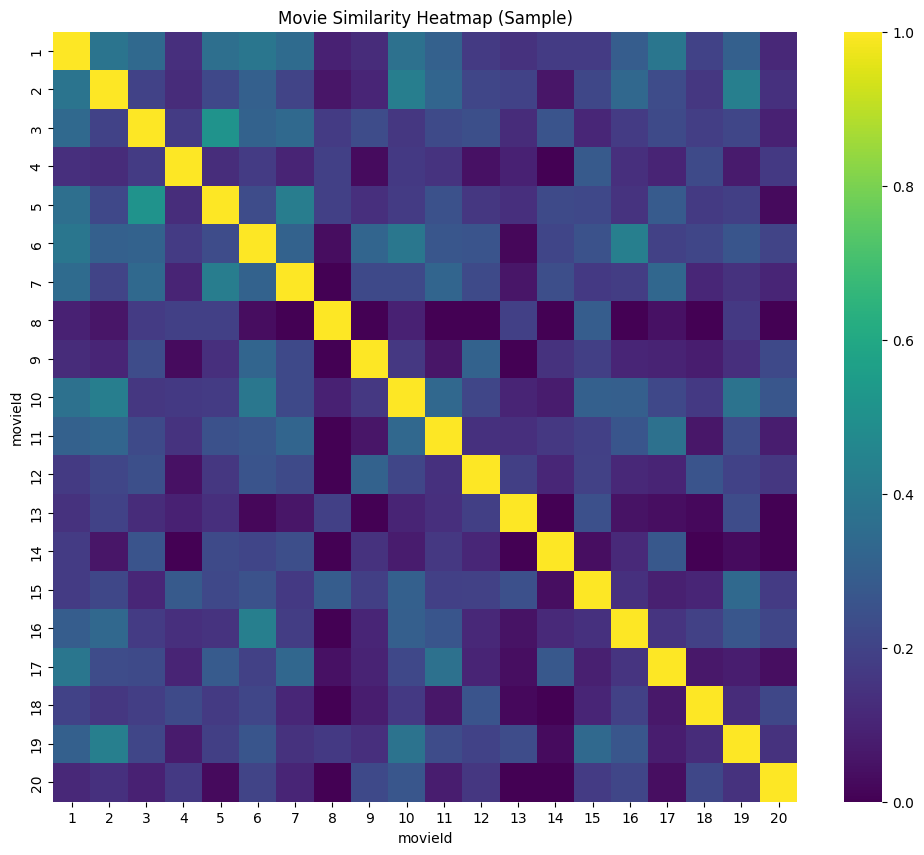

In [ ]:
# Select a subset for visualization
subset = item_similarity_df.iloc[:20, :20]
plt.figure(figsize=(12,10))
sns.heatmap(subset, cmap='viridis')
plt.title('Movie Similarity Heatmap (Sample)')
plt.show()
